# Cleaning Process of our Datasets

In [158]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Book Dataset

In [159]:
book = pd.read_csv("books.csv", sep=';', on_bad_lines = 'skip', encoding='latin-1')
book.shape

C:\Users\Xing Yu\AppData\Local\Temp\ipykernel_11004\3205922688.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("books.csv", sep=';', on_bad_lines = 'skip', encoding='latin-1')


(271360, 8)

In [160]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [161]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [162]:
book.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [163]:
book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360,271358
unique,271360,242135,102022,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [164]:
book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [165]:
book[book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [166]:
book.loc[book.ISBN == '9627982032', 'Book-Author'] = "Larissa Anne Downes"
book.loc[book.ISBN == '0751352497', 'Book-Author'] = "Unknown"

In [167]:
book[book['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [168]:
book.loc[book.ISBN == '193169656X', 'Publisher'] = "Mundania Pr"
book.loc[book.ISBN == '1931696993', 'Publisher'] = "Scribner"

In [169]:
book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [170]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [171]:
book[book['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [172]:
# Fill in the correct information
# ISBN '078946697X'
book.loc[book.ISBN == '078946697X','Year-Of-Publication'] = 2000
book.loc[book.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
book.loc[book.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
book.loc[book.ISBN == '0789466953','Year-Of-Publication'] = 2000
book.loc[book.ISBN == '0789466953','Book-Author'] = "James Buckley"
book.loc[book.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [173]:
book.loc[book['Year-Of-Publication']== 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [174]:
book.loc[book.ISBN=='2070426769','Year-Of-Publication'] = 2003
book.loc[book.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
book.loc[book.ISBN=='2070426769','Publisher']='Gallimard'
book.loc[book.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

Since errors with misinformation is not so much, the parts above can be done by searching on the internet then fill it into the errors.

In [175]:
book[book['Book-Title'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
239,0743486226,Angels &amp; Demons,Dan Brown,2003,Atria
355,0140374248,James and the Giant Peach,Roald Dahl,2000,Penguin USA (Paper)
405,006101351X,The Perfect Storm : A True Story of Men Agains...,Sebastian Junger,1998,HarperTorch
456,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
475,014023828X,The Tortilla Curtain,T. Coraghessan Boyle,1996,Penguin Books
...,...,...,...,...,...
271246,0195124995,For Cause and Comrades: Why Men Fought in the ...,James M. McPherson,1998,Oxford University Press
271315,1902852036,All the Queen's Men,Nick Elwood,1999,Gay Men's Press
271316,0441011799,Singularity Sky,Charles Stross,2004,Ace
271346,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin


In [176]:
# Dropping duplicated Book Title
book.drop_duplicates(subset='Book-Title', keep='first', inplace=True)
book.reset_index(drop=True, inplace=True)  

In [177]:
book[book['Book-Title'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


Year Section

In [178]:
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)

In [179]:
book[book['Year-Of-Publication'] > 2023]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
34802,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
51331,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
71477,0870449842,Crossing America,National Geographic Society,2030,National Geographic
73342,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
88937,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
105262,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
107251,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
173220,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic
204209,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster
220497,0380000059,CLOUT,D. GIBBONS,2024,Avon


In [180]:
book[book['Year-Of-Publication'] < 1800]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
287,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
350,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
536,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
241626,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
241731,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
241891,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
241968,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [181]:
# Create a new dataframe that consists of all of the outlier years.
outlierYear = book[(book['Year-Of-Publication'] < 1800) | (book['Year-Of-Publication'] > 2023)]
outlierYear.shape

(3929, 5)

In [182]:
# Dropping the outlier years from the original dataframe.
book = book.drop(outlierYear.index)

In [183]:
book.shape

(238206, 5)

In [184]:
# Import another dataset hoping there would be year for each outlier years.
book2 = pd.read_csv("BookFromAnotherBrench.csv")

In [185]:
book2.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [186]:
outlierYear.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [187]:
book2= book2[['isbn','original_publication_year']]
book2 = book2.rename(columns=str.upper)

In [188]:
book2

,ISBN,ORIGINAL_PUBLICATION_YEAR
0,439023483,2008.0
1,439554934,1997.0
2,316015849,2005.0
3,61120081,1960.0
4,743273567,1925.0
...,...,...
9995,441019455,2010.0
9996,067973371X,1990.0
9997,039330762X,1977.0
9998,61711527,2011.0


In [189]:
MergeFile = pd.merge(outlierYear, book2, on='ISBN', how='inner')
MergeFile.shape

(2, 6)

Since after merged, there are only two IBSNs matched. Therefore, the solution above does not work. Instead, fill the outlier years with a String "Not in our System".

In [190]:
# Fill the Year with Nan
outlierYear['Year-Of-Publication'] = np.nan

In [191]:
# Replace the Nan with "Not in our System"
outlierYear = outlierYear.fillna("Not in our System")

In [192]:
# Connect it back to the original dataframe
book = pd.concat([book, outlierYear])

# Rating Dataset


In [193]:
rating = pd.read_csv('ratings.csv',  sep=';', on_bad_lines = 'skip', encoding='latin-1')

In [194]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [195]:
rating.shape

(1149780, 3)

In [196]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [197]:
rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [198]:
print("Number of unique IDs is {} and ISBN no. is {}".format(rating['User-ID'].nunique(), rating['ISBN'].nunique()))

Number of unique IDs is 105283 and ISBN no. is 340556


In [199]:
rating['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [200]:
rating_new = rating[rating['ISBN'].isin(book['ISBN'])]

In [201]:
rating_new.shape

(883079, 3)

In [202]:
rating_new['Book-Rating'].value_counts().reset_index()

,Book-Rating,count
0,0,554844
1,8,78081
2,10,61134
3,7,56790
4,9,51487
5,5,39280
6,6,27203
7,4,6545
8,3,4376
9,2,2037


In [203]:
explicit_rating = rating_new[rating_new['Book-Rating'] != 0]
implicit_rating = rating_new[rating_new['Book-Rating'] == 0]

In [204]:
explicit_rating.shape

(328235, 3)

In [205]:
explicit_rating.to_csv('explicit_rating.csv')

C:\Users\Xing Yu\AppData\Local\Temp\ipykernel_11004\143856815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rating, x= 'Book-Rating', palette='Set2')


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

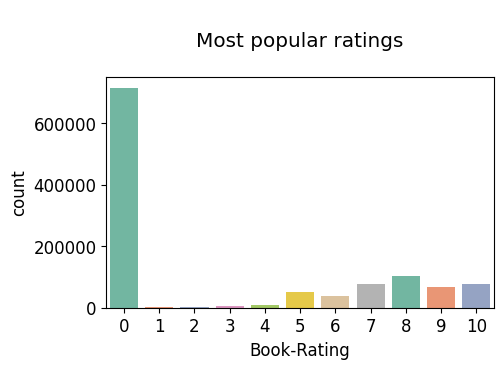

In [206]:
plt.figure(figsize=[5,3])
plt.rc('font', size=12)
plt.title("\nMost popular ratings\n")
sns.countplot(data=rating, x= 'Book-Rating', palette='Set2')

# Users Dataset

In [207]:
user = pd.read_csv('users.csv',  sep=';', on_bad_lines = 'skip', encoding='latin-1')

In [208]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [209]:
user.shape

(278858, 3)

In [210]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [211]:
user.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [212]:
user['Age'].describe()


count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

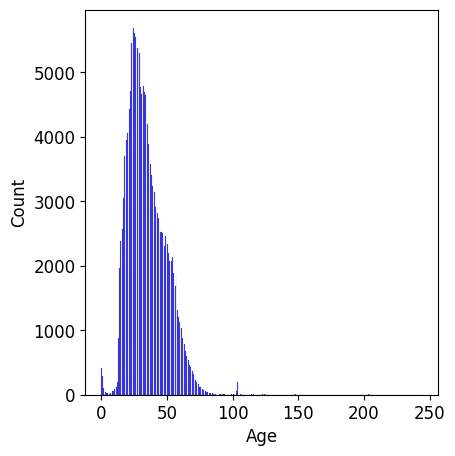

In [213]:
# Histogram showing distribution of ages
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=user, color='b')

In [214]:
# Create a seperate Dataframe that stores the outliers and NULL values in column "Age"
filtered_df = user[pd.isnull(user['Age']) | (user['Age'] < 5) | (user['Age'] > 95)]
filtered_df.shape

(112029, 3)

In [215]:
# Drop the newly created Dataframe from the original Dataframe
user = user.drop(filtered_df.index)

In [216]:
# Create another Dataframe that get only the User-ID that appears in Dataframe filtered_df and explicit_rating  
# This dataframe only gets User ID that rate books. 
filterd_age_rate = filtered_df[filtered_df['User-ID'].isin(explicit_rating['User-ID'])]
filterd_age_rate.shape

(24836, 3)

In [217]:
# Fill the filtered_age_rate with Nan, Then fill the Nan with mean of Dataframe User.
filterd_age_rate['Age'] = np.nan
filterd_age_rate.fillna(round(34.739380), inplace=True)
filterd_age_rate

C:\Users\Xing Yu\AppData\Local\Temp\ipykernel_11004\3438820086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_age_rate['Age'] = np.nan
C:\Users\Xing Yu\AppData\Local\Temp\ipykernel_11004\3438820086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_age_rate.fillna(round(34.739380), inplace=True)


,User-ID,Location,Age
7,8,"timmins, ontario, canada",35.0
8,9,"germantown, tennessee, usa",35.0
11,12,"fort bragg, california, usa",35.0
13,14,"mediapolis, iowa, usa",35.0
15,16,"albuquerque, new mexico, usa",35.0
...,...,...,...
278772,278773,"alexandria, virginia, usa",35.0
278776,278777,"overland park, kansas,",35.0
278824,278825,"portland, oregon, usa",35.0
278827,278828,"germantown, illinois, usa",35.0


In [218]:
# Connect it back to the original Dataframe. 
user = pd.concat([user, filterd_age_rate])
user

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278772,278773,"alexandria, virginia, usa",35.0
278776,278777,"overland park, kansas,",35.0
278824,278825,"portland, oregon, usa",35.0
278827,278828,"germantown, illinois, usa",35.0


In [219]:
def age_group(age):
    if age < 13:
        x = 'Children'
    elif 13 <= age < 18:
        x = 'Teenager'
    elif 18 <= age <36:
        x = 'Adult'
    elif 36<= age < 56:
        x = 'Middle-Aged Adult'
    else:
        x= 'Elderly'
    return x

In [220]:
user['Age-Group'] = user['Age'].apply(lambda x: age_group(x))

In [221]:
for i in user:
    user['Country']=user.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [222]:
user.drop('Location', inplace= True, axis=1)

In [223]:
user['Country']

1               usa
3          portugal
5               usa
9             spain
10        australia
            ...    
278772          usa
278776             
278824          usa
278827          usa
278853          usa
Name: Country, Length: 191665, dtype: object

In [224]:
user['Country']= user['Country'].str.upper()
user.head(5)

,User-ID,Age,Age-Group,Country
1,2,18.0,Adult,USA
3,4,17.0,Teenager,PORTUGAL
5,6,61.0,Elderly,USA
9,10,26.0,Adult,SPAIN
10,11,14.0,Teenager,AUSTRALIA


# Merging the datasets

In [225]:
df = pd.merge(book, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, user, on='User-ID', how='inner')

In [226]:
df.shape

(328235, 10)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 328235 non-null  object 
 1   Book-Title           328235 non-null  object 
 2   Book-Author          328235 non-null  object 
 3   Year-Of-Publication  328235 non-null  object 
 4   Publisher            328235 non-null  object 
 5   User-ID              328235 non-null  int64  
 6   Book-Rating          328235 non-null  int64  
 7   Age                  328235 non-null  float64
 8   Age-Group            328235 non-null  object 
 9   Country              322102 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


In [228]:
df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age-Group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35.0,Adult,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35.0,Adult,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35.0,Adult,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35.0,Adult,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35.0,Adult,CANADA


In [229]:
df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
User-ID                   0
Book-Rating               0
Age                       0
Age-Group                 0
Country                6133
dtype: int64

In [230]:
df.fillna("UNKNOWN", inplace=True)

# **Popularity-Based Recommendation System**

### **Famous Books Based**

In [231]:
# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, book, on='ISBN')
  return 'Please enter a valid value of n!'

In [232]:
most_popular(df, 3)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,487,The Da Vinci Code,Dan Brown,2003,Doubleday


#### **Country-based book recommendation**

In [233]:
# function for getting most popular recommendations country wise

def country_popular(df, country):
  if country in list(df.Country.unique()):
    return most_popular(df[df['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [234]:
country_popular(df, 'FRANCE')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2290311782,18,Je Voudrais Que Quelqu'un M'Attende Quelque Part,Anna Gavalda,2001,Editions J'Ai Lu
1,2253044903,15,Le Parfum : Histoire d'un meurtrier,Patrick SÃ?Â¼skind,1988,LGF
2,2253150711,15,Stupeur Et Tremblements,Amelie Nothomb,2001,Distribooks
3,2070408507,12,Le Petit Prince,Antoine de Saint-ExupÃ©ry,1999,Gallimard
4,2266104535,11,Et Si C'Etait Vrai / If This Were Only True,Marc Levy,2001,Pocket


# **Collaborative Filtering**


### Collaborating Filtering is a process of filtering data from user reviews to make personalized recommendations for users with similar preferences

# **Memory Based**

### Memory based is 

In [235]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

In [238]:
# Filtering our dataset to avoid memory problems
required_ratings = 3

user = df['user_id'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['user_id'].isin(user_list)]


In [239]:
filter_df

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,age_group,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35.0,Adult,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35.0,Adult,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35.0,Adult,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35.0,Adult,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35.0,Adult,CANADA
...,...,...,...,...,...,...,...,...,...,...
327258,2831513278,Berlitz Complete Guide to Cruising and Cruise ...,Douglas Ward,1994,Langenscheidt Pub Inc,241247,6,35.0,Adult,AUSTRALIA
327335,0753804700,Reader,Bernhard Schlink,Not in our System,Phoenix Books,163925,7,49.0,Middle-Aged Adult,UNITED KINGDOM
327336,0002257203,Restraint of Beasts,Magnus Mills,Not in our System,Harpercollins Uk,163925,8,49.0,Middle-Aged Adult,UNITED KINGDOM
327337,0041490355,Light On Yoga,Bks Iyengar,Not in our System,Routledge,163925,10,49.0,Middle-Aged Adult,UNITED KINGDOM


In [240]:
# top 10% most frequently rated books
required = len(filter_df.isbn.unique()) * 0.1

user_list = filter_df['book_title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['book_title'].isin(user_list)]

In [241]:
filter_df

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,age_group,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35.0,Adult,CANADA
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,35.0,Adult,UNKNOWN
8,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,35.0,Adult,UNKNOWN
10,0440234743,The Testament,John Grisham,1999,Dell,11676,9,35.0,Adult,UNKNOWN
11,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676,8,35.0,Adult,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
324089,0877853134,The Arrivals,Naomi Gladish Smith,2004,Chrysalis Books,223503,10,39.0,Middle-Aged Adult,USA
324456,1857022424,Shipping News,E Annie Proulx,Not in our System,Fourth Estate,188529,10,35.0,Adult,UNITED KINGDOM
324693,0330267388,"Life,the Universe and Everything",Douglas Adams,Not in our System,Pan Books Ltd,161577,8,55.0,Middle-Aged Adult,UNITED KINGDOM
326023,0330294911,Man Who Mistook His Wife for a Hat,Oliver Sacks,Not in our System,Pan Books Ltd,142556,7,29.0,Adult,PORTUGAL


In [244]:
# creating a pivot table
table = filter_df.pivot_table(columns='user_id', index='book_title', values='book_rating')
table.fillna(0, inplace=True)
table

user_id,8,17,53,99,114,232,242,243,244,254,...,278565,278582,278633,278637,278648,278694,278773,278843,278851,278854
book_title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<11772x13009 sparse matrix of type '<class 'numpy.float64'>'
	with 125830 stored elements in Compressed Sparse Row format>

In [246]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [247]:
def recommender(book_name):
  book_id = np.where(table.index == book_name)[0][0]
  distance, suggestion = model.kneighbors(table.iloc[book_id, :].values.reshape(1, -1), n_neighbors = 6)

  for i in range(len(suggestion)):
    books = table.index[suggestion[i]]
    for j in books:
      print(j)

In [248]:
recommender("Harry Potter and the Goblet of Fire (Book 4)")

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
REMEMBRANCE : REMEMBRANCE


In [252]:
book = pd.read_csv("books.csv", sep=';', on_bad_lines = 'skip', encoding='latin-1')

C:\Users\Xing Yu\AppData\Local\Temp\ipykernel_11004\3249062672.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("books.csv", sep=';', on_bad_lines = 'skip', encoding='latin-1')


In [253]:
book.columns = book.columns.str.strip().str.lower().str.replace('-', '_')

In [262]:
new_df = pd.merge(df, book, on='isbn', how='inner')

In [264]:
new_df.drop(columns=['book_title_y', 'book_author_y', 'year_of_publication_y', 'publisher_y'], inplace=True)

In [266]:
new_df.rename(columns={
    'book_title_x': 'book_title',  # Renaming columns from dataset A
    'book_author_x': 'book_author',
    'year_of_publication_x': 'year_of_publication',
    'publisher_x': 'publisher'  # Renaming the publisher column from dataset B
}, inplace=True)

In [267]:
new_df

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,age_group,country,image_url_s,image_url_m,image_url_l
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35.0,Adult,CANADA,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,35.0,Adult,UNKNOWN,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8,30.0,Adult,CANADA,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9,35.0,Adult,,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9,35.0,Adult,CANADA,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328230,8804409118,Nuvola Di Smog Formica Argentina,Italo Calvino,Not in our System,Oscar Italian,215417,9,22.0,Adult,ITALY,http://images.amazon.com/images/P/8804409118.0...,http://images.amazon.com/images/P/8804409118.0...,http://images.amazon.com/images/P/8804409118.0...
328231,0517209039,Dubliners a Portrait of the Artist As A,James Joyce,Not in our System,Random House~trade,217349,8,25.0,Adult,GERMANY,http://images.amazon.com/images/P/0517209039.0...,http://images.amazon.com/images/P/0517209039.0...,http://images.amazon.com/images/P/0517209039.0...
328232,0586089268,Works of Genius,Richard Marek,Not in our System,Hunter Publishing+inc,231342,6,35.0,Adult,UNITED KINGDOM,http://images.amazon.com/images/P/0586089268.0...,http://images.amazon.com/images/P/0586089268.0...,http://images.amazon.com/images/P/0586089268.0...
328233,8807840146,Next,Baricco,Not in our System,Feltrinelli,235944,8,35.0,Adult,ITALY,http://images.amazon.com/images/P/8807840146.0...,http://images.amazon.com/images/P/8807840146.0...,http://images.amazon.com/images/P/8807840146.0...


In [268]:
bookname = table.index

In [272]:
import pickle

In [273]:
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(bookname, open('bookname.pkl', 'wb'))
pickle.dump(new_df, open('new_df.pkl', 'wb'))
pickle.dump(table, open('df_pivot.pkl', 'wb'))